In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import time

In [69]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [70]:
df.shape

(145460, 23)

In [71]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [73]:
numeric_cols = np.array(df.select_dtypes(include=['int64', 'float64']).columns)
numeric_cols

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm'], dtype=object)

In [74]:
categorical_cols = np.array(df.select_dtypes(exclude=['int64', 'float64']).columns)
categorical_cols

array(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'], dtype=object)

In [75]:
df.groupby('Location').count()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,
Adelaide,3193,3191,3190,3091,1704,1769,3167,3167,2919,3177,...,3188,3188,3185,3186,0,0,3188,3189,3091,3090
Albany,3040,2977,2986,3016,2750,2520,0,0,2793,2257,...,2991,2324,3015,3015,3002,2329,3001,2328,3016,3016
Albury,3040,3029,3029,3011,0,0,3008,3008,2515,2994,...,3031,3032,3035,3032,1289,1427,3031,3032,3011,3011
AliceSprings,3040,3039,3038,3032,2825,2520,2989,2989,2810,3036,...,3037,3035,3039,3037,2706,2679,3040,3038,3032,3031
BadgerysCreek,3009,2973,2980,2928,0,0,2933,2933,2574,2924,...,2955,2954,2841,2836,0,0,2968,2965,2928,2928
Ballarat,3040,3039,3039,3028,0,0,3009,3009,2949,3022,...,3019,3033,3016,3014,2494,1992,3028,3034,3028,3028
Bendigo,3040,3038,3035,3034,1185,0,2999,3000,2796,2997,...,3033,3038,3025,3030,2072,2268,3037,3038,3034,3034
Brisbane,3193,3184,3179,3161,3174,3144,3152,3152,3123,3159,...,3189,3178,3192,3185,3192,3191,3189,3178,3161,3161
Cairns,3040,3039,3040,2988,2670,2564,3021,3022,2997,3036,...,3039,3040,3039,3040,2833,2810,3039,3040,2988,2988


## Categorical Encoding

In [76]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

In [77]:
# Wind direction to degrees mapping
wind_dir_map = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

In [78]:
for key, value in wind_dir_map.items():
    wind_dir_map[key] = (value * np.pi) / 180

In [79]:
wind_dir_map

{'N': 0.0,
 'NNE': 0.39269908169872414,
 'NE': 0.7853981633974483,
 'ENE': 1.1780972450961724,
 'E': 1.5707963267948966,
 'ESE': 1.9634954084936207,
 'SE': 2.356194490192345,
 'SSE': 2.748893571891069,
 'S': 3.141592653589793,
 'SSW': 3.534291735288517,
 'SW': 3.9269908169872414,
 'WSW': 4.319689898685966,
 'W': 4.71238898038469,
 'WNW': 5.105088062083414,
 'NW': 5.497787143782138,
 'NNW': 5.8904862254808625}

In [80]:
df[['RainToday','RainTomorrow']] = pd.get_dummies(df[['RainToday','RainTomorrow']], drop_first=True, dtype=int)
df['WindDir9am'] = df['WindDir9am'].map(wind_dir_map)
df['WindDir3pm'] = df['WindDir3pm'].map(wind_dir_map)
df['WindGustDir'] = df['WindGustDir'].map(wind_dir_map)

In [81]:
df['Date'] = pd.to_datetime(df['Date'])

In [82]:
df['DayOfYear'] = df['Date'].dt.dayofyear

In [83]:
# label_encoder = LabelEncoder()

In [85]:
encoder = TargetEncoder(cols=['Location'])

In [86]:
df['Location'] = encoder.fit_transform(df['Location'], df['RainTomorrow'])

In [87]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,DayOfYear
0,2008-12-01,0.203289,13.4,22.9,0.6,NaN,NaN,4.712389,44.0,4.712389,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,336
1,2008-12-02,0.203289,7.4,25.1,0.0,NaN,NaN,5.105088,44.0,5.890486,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,337
2,2008-12-03,0.203289,12.9,25.7,0.0,NaN,NaN,4.319690,46.0,4.712389,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,338
3,2008-12-04,0.203289,9.2,28.0,0.0,NaN,NaN,0.785398,24.0,2.356194,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,339
4,2008-12-05,0.203289,17.5,32.3,1.0,NaN,NaN,4.712389,41.0,1.178097,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,340


## Imputing missing values

In [88]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
DayOfYear            0
dtype: int64

In [188]:
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [89]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [192]:
df_imputed = df.drop('Date',axis=1).copy(deep=True)

In [193]:
imputer = IterativeImputer()

In [194]:
df_imputed.iloc[:, :] = imputer.fit_transform(df.drop('Date',axis=1))

D:\Softwares\Anaconda3\envs\my_env\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [195]:
df_imputed.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
DayOfYear        0
dtype: int64

In [196]:
df_imputed.shape

(145460, 23)

### Remove outliers

In [197]:
def draw_boxplot(numeric_cols, df):
    n = len(numeric_cols)

    fig, axes = plt.subplots(nrows=(n // 4), ncols=4, figsize=(20, n * 1.5))
    axes = axes.flatten()
    for i, col in enumerate(numeric_cols):
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(col)
    
    plt.tight_layout()
    plt.show()

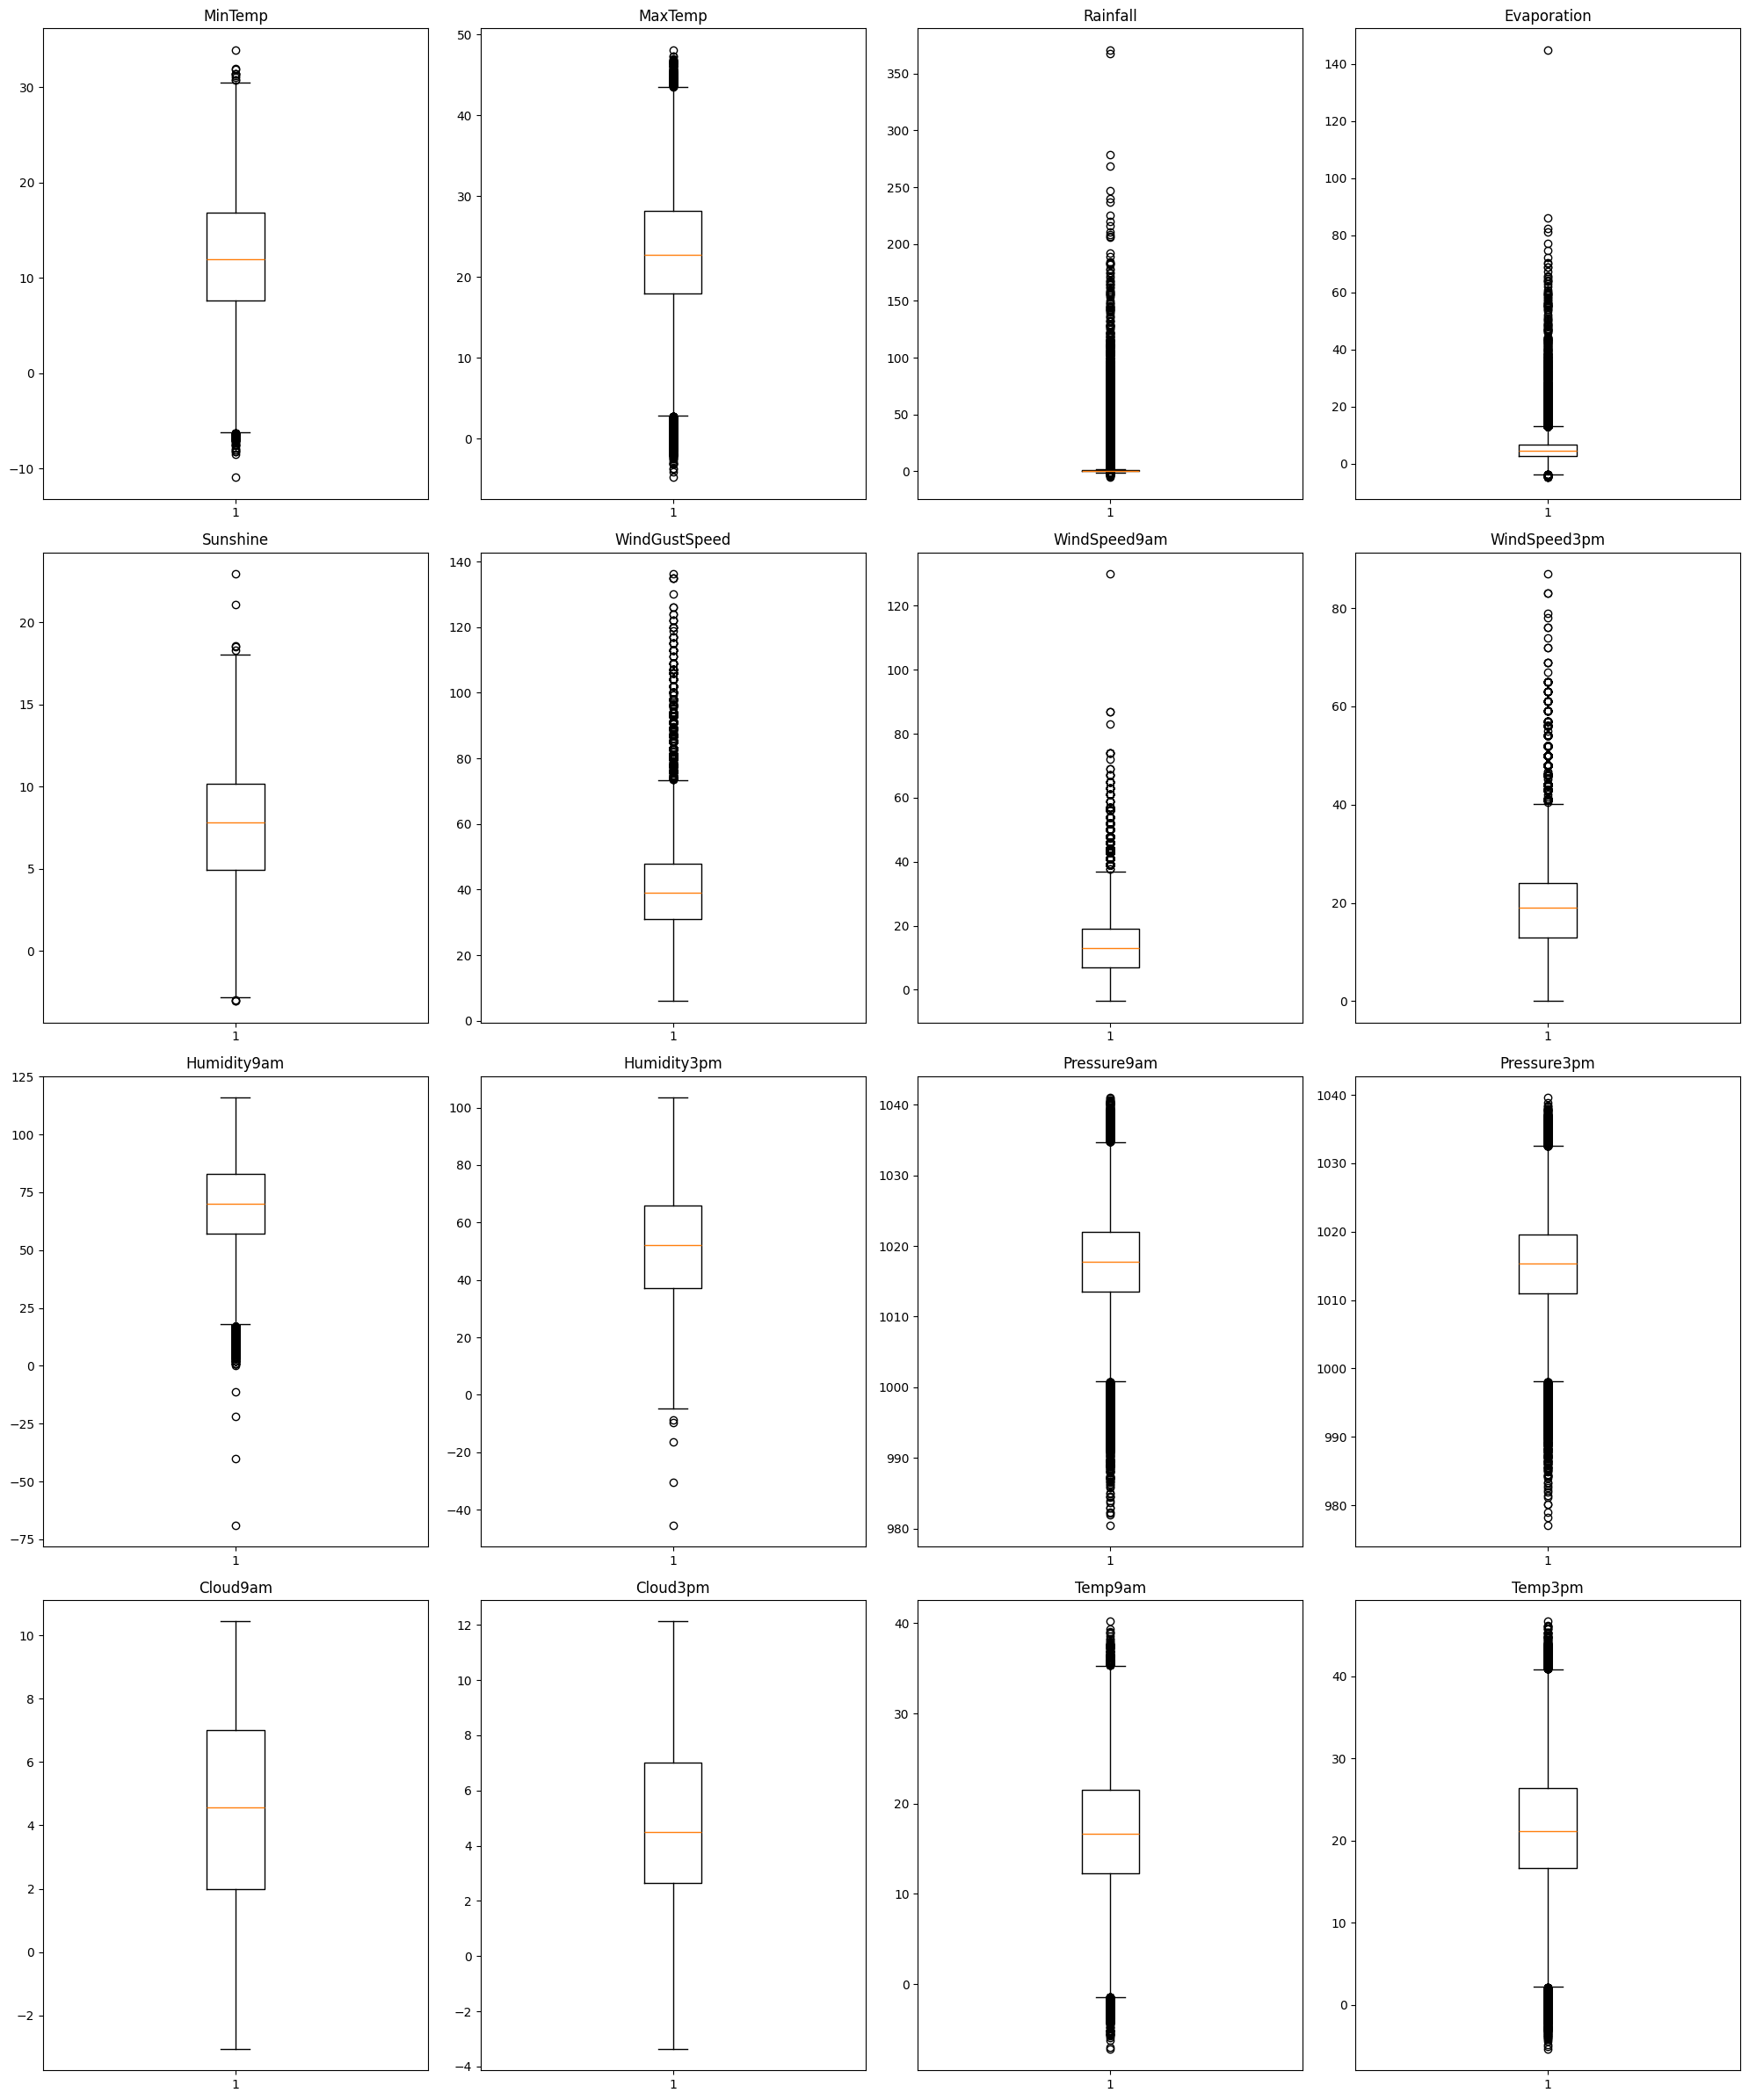

In [198]:
draw_boxplot(numeric_cols, df_imputed)

In [199]:
for col in numeric_cols:
    Q1 = df_imputed[col].quantile(0.25)
    Q3 = df_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    n = df_imputed[(df_imputed[col] < lower_bound) | (df_imputed[col] > upper_bound)].shape[0]
    print(f'The number of outliers of {col} is {n}')
    # rain = rain[(rain[col] >= lower_bound) & (rain[col] <= upper_bound)]

The number of outliers of MinTemp is 65
The number of outliers of MaxTemp is 549
The number of outliers of Rainfall is 26358
The number of outliers of Evaporation is 3521
The number of outliers of Sunshine is 8
The number of outliers of WindGustSpeed is 3164
The number of outliers of WindSpeed9am is 1820
The number of outliers of WindSpeed3pm is 2535
The number of outliers of Humidity9am is 1429
The number of outliers of Humidity3pm is 5
The number of outliers of Pressure9am is 2401
The number of outliers of Pressure3pm is 1973
The number of outliers of Cloud9am is 0
The number of outliers of Cloud3pm is 0
The number of outliers of Temp9am is 343
The number of outliers of Temp3pm is 875


In [200]:
Q1 = df_imputed[numeric_cols].quantile(0.25)
Q3 = df_imputed[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
df_imputed = df_imputed[~((df_imputed[numeric_cols] < lower_bound) |(df_imputed[numeric_cols] > upper_bound)).any(axis=1)]

In [201]:
df_imputed.shape

(109612, 23)

## Splitting and holding out data

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE

### Check imbalanced target

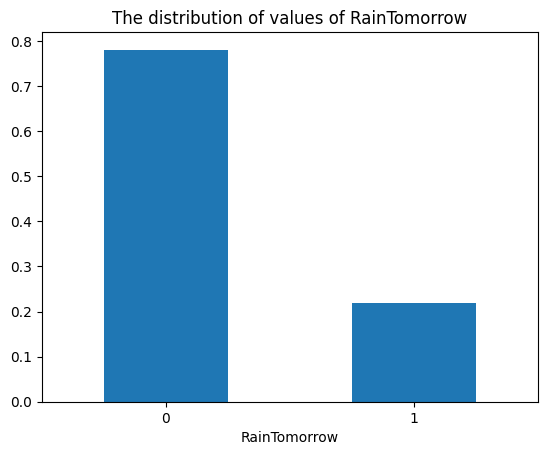

In [202]:
df['RainTomorrow'].value_counts(normalize=True).plot(kind='bar')
plt.title('The distribution of values of RainTomorrow')
plt.xticks(rotation=0)
plt.show()

In [203]:
sm = SMOTE(sampling_strategy='minority', random_state=19)

In [204]:
def split_hold_out_samples(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
    X_train_resempled, y_train_resempled = sm.fit_resample(X_train, y_train)
    return X_train_resempled, X_test, y_train_resempled, y_test

In [283]:
X_train_resempled, X_test, y_train_resempled, y_test = split_hold_out_samples(df_imputed.drop(['RainTomorrow'],axis=1), df_imputed['RainTomorrow'])

In [285]:
X_train_resempled.shape

(148002, 22)

In [286]:
X_test.shape

(21923, 22)

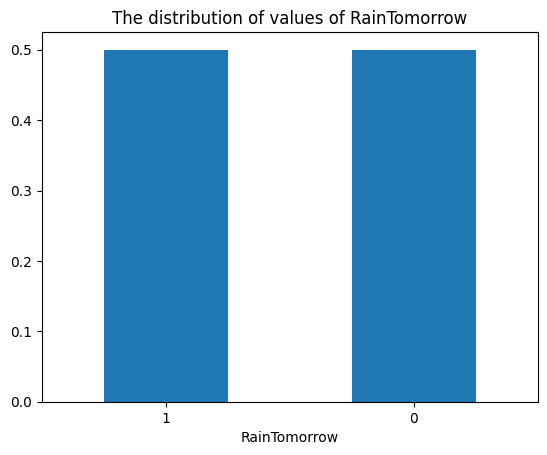

In [287]:
y_train_resempled.value_counts(normalize=True).plot(kind='bar')
plt.title('The distribution of values of RainTomorrow')
plt.xticks(rotation=0)
plt.show()

## Training model

In [208]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, 
confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score, classification_report, roc_curve)

In [209]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif

In [288]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [289]:
def run_model(model, X_train, y_train, X_test, y_test):
    t0=time.time()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time_taken = time.time()-t0
    print('Accuracy = {}'.format(accuracy))
    print('ROC Area under Curve = {}'.format(roc_auc))
    print('Time taken = {}'.format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    
    return model, accuracy, roc_auc, f1, time_taken

### Random Forest Classifier model

In [290]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

In [294]:
model_rf = RandomForestClassifier(**params_rf)

Accuracy = 0.8725539387857502
ROC Area under Curve = 0.7968831570123924
Time taken = 131.65667366981506
              precision    recall  f1-score   support

           0    0.94012   0.90680   0.92316     18508
           1    0.57627   0.68697   0.62677      3415

    accuracy                        0.87255     21923
   macro avg    0.75819   0.79688   0.77496     21923
weighted avg    0.88344   0.87255   0.87699     21923



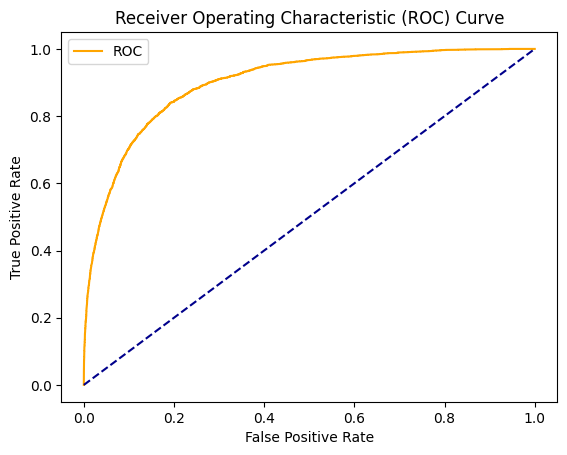

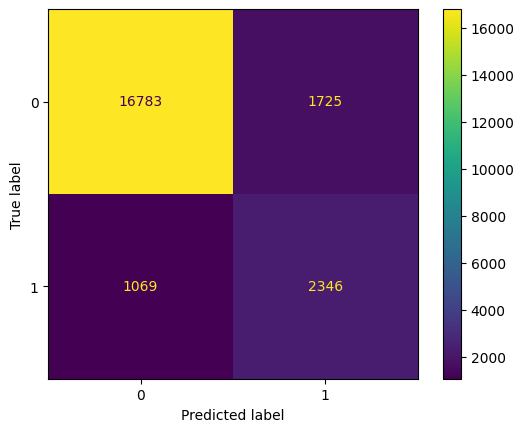

In [295]:
model_rf, accuracy, roc_auc, f1, time_taken = run_model(model_rf, X_train_resempled, y_train_resempled, X_test, y_test)

### KNN model

In [216]:
min_max_sc = MinMaxScaler()

In [224]:
X_train_normalized = min_max_sc.fit_transform(X_train_resempled)
X_test_normalized = min_max_sc.transform(X_test)

In [225]:
model_knn = KNeighborsClassifier()

Accuracy = 0.7919080417826028
ROC Area under Curve = 0.7655968880221476
Time taken = 7.557265996932983
              precision    recall  f1-score   support

           0    0.94111   0.80381   0.86706     18508
           1    0.40621   0.72738   0.52130      3415

    accuracy                        0.79191     21923
   macro avg    0.67366   0.76560   0.69418     21923
weighted avg    0.85778   0.79191   0.81320     21923



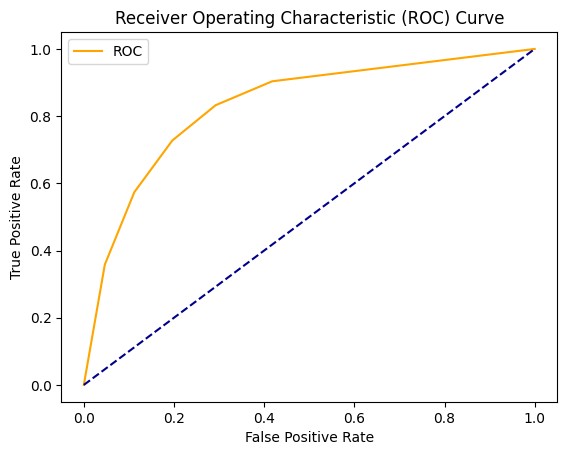

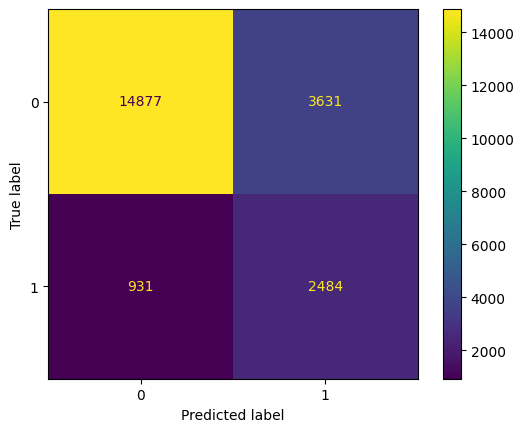

In [226]:
model_knn, accuracy, roc_auc, f1, time_taken = run_model(model_knn, X_train_normalized, y_train_resempled, X_test_normalized, y_test)

### Logistic Regression model

In [227]:
params_lr = {'penalty': 'l1', 'solver':'liblinear', 'random_state': 39, 'max_iter': 400}

In [228]:
z_score_sc = StandardScaler()

In [229]:
X_train_normalized = z_score_sc.fit_transform(X_train_resempled)
X_test_normalized = z_score_sc.transform(X_test)

In [230]:
model_lr = LogisticRegression(**params_lr)

Accuracy = 0.8029010628107467
ROC Area under Curve = 0.7863158933131998
Time taken = 7.13599967956543
              precision    recall  f1-score   support

           0    0.94864   0.81041   0.87409     18508
           1    0.42588   0.76223   0.54645      3415

    accuracy                        0.80290     21923
   macro avg    0.68726   0.78632   0.71027     21923
weighted avg    0.86721   0.80290   0.82305     21923



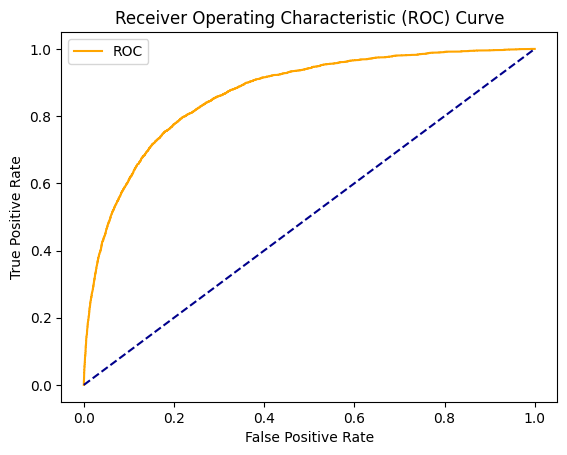

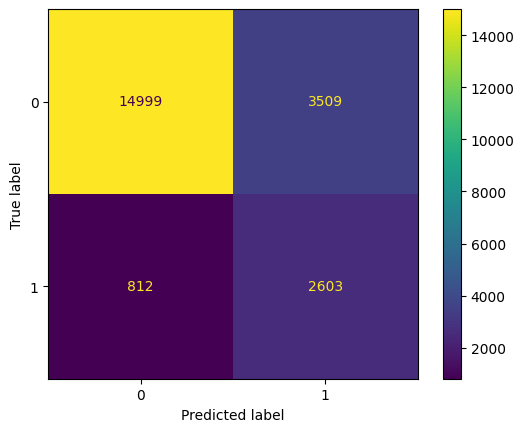

In [231]:
model_lr, accuracy_lr, roc_auc_lr, f1_lr, t_lr = run_model(model_lr, X_train_normalized, y_train_resempled, X_test_normalized, y_test)

### Naive Bayes model

In [232]:
model_nb = GaussianNB()

Accuracy = 0.7412306709848104
ROC Area under Curve = 0.74859717186126
Time taken = 0.19993305206298828
              precision    recall  f1-score   support

           0    0.94323   0.73790   0.82802     18508
           1    0.34833   0.75930   0.47758      3415

    accuracy                        0.74123     21923
   macro avg    0.64578   0.74860   0.65280     21923
weighted avg    0.85056   0.74123   0.77343     21923



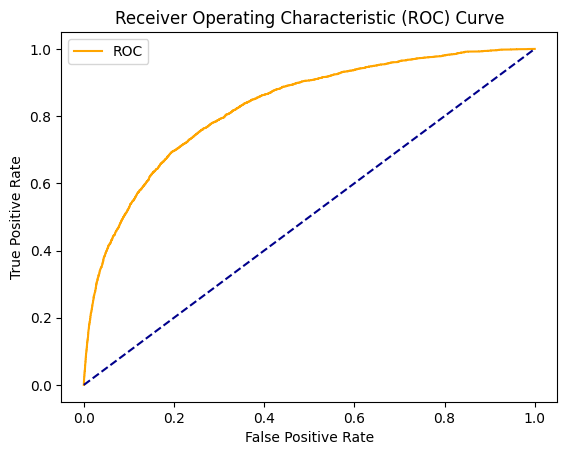

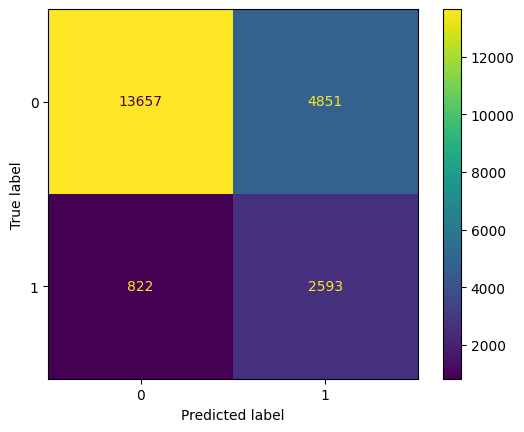

In [233]:
model_nb, accuracy_nb, roc_auc_nb, f1_nb, t_nb = run_model(model_nb, X_train_resempled, y_train_resempled, X_test, y_test)

### XGBoost model

In [234]:
model_xg = XGBClassifier(n_estimators=200, learning_rate=1, objective='binary:logistic')

Accuracy = 0.8922592710851617
ROC Area under Curve = 0.7723763314253563
Time taken = 3.0537161827087402
              precision    recall  f1-score   support

           0    0.92737   0.94651   0.93684     18508
           1    0.67359   0.59824   0.63368      3415

    accuracy                        0.89226     21923
   macro avg    0.80048   0.77238   0.78526     21923
weighted avg    0.88784   0.89226   0.88962     21923



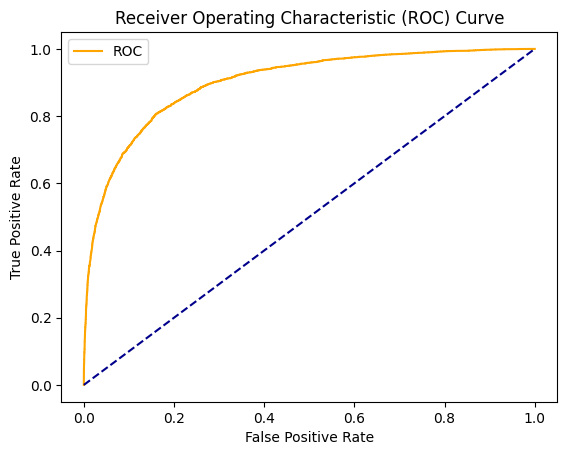

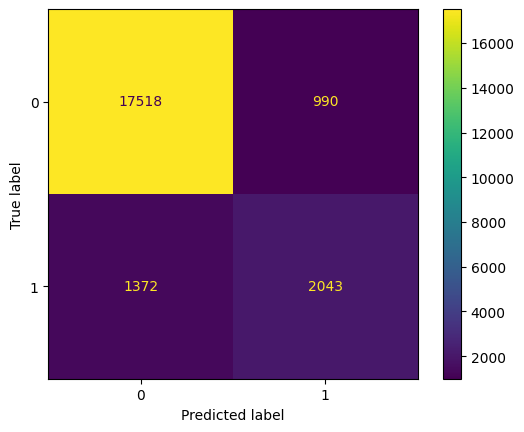

In [235]:
model_xg, accuracy, roc_auc, f1, time_taken = run_model(model_xg, X_train_resempled, y_train_resempled, X_test, y_test)

### Feature selection

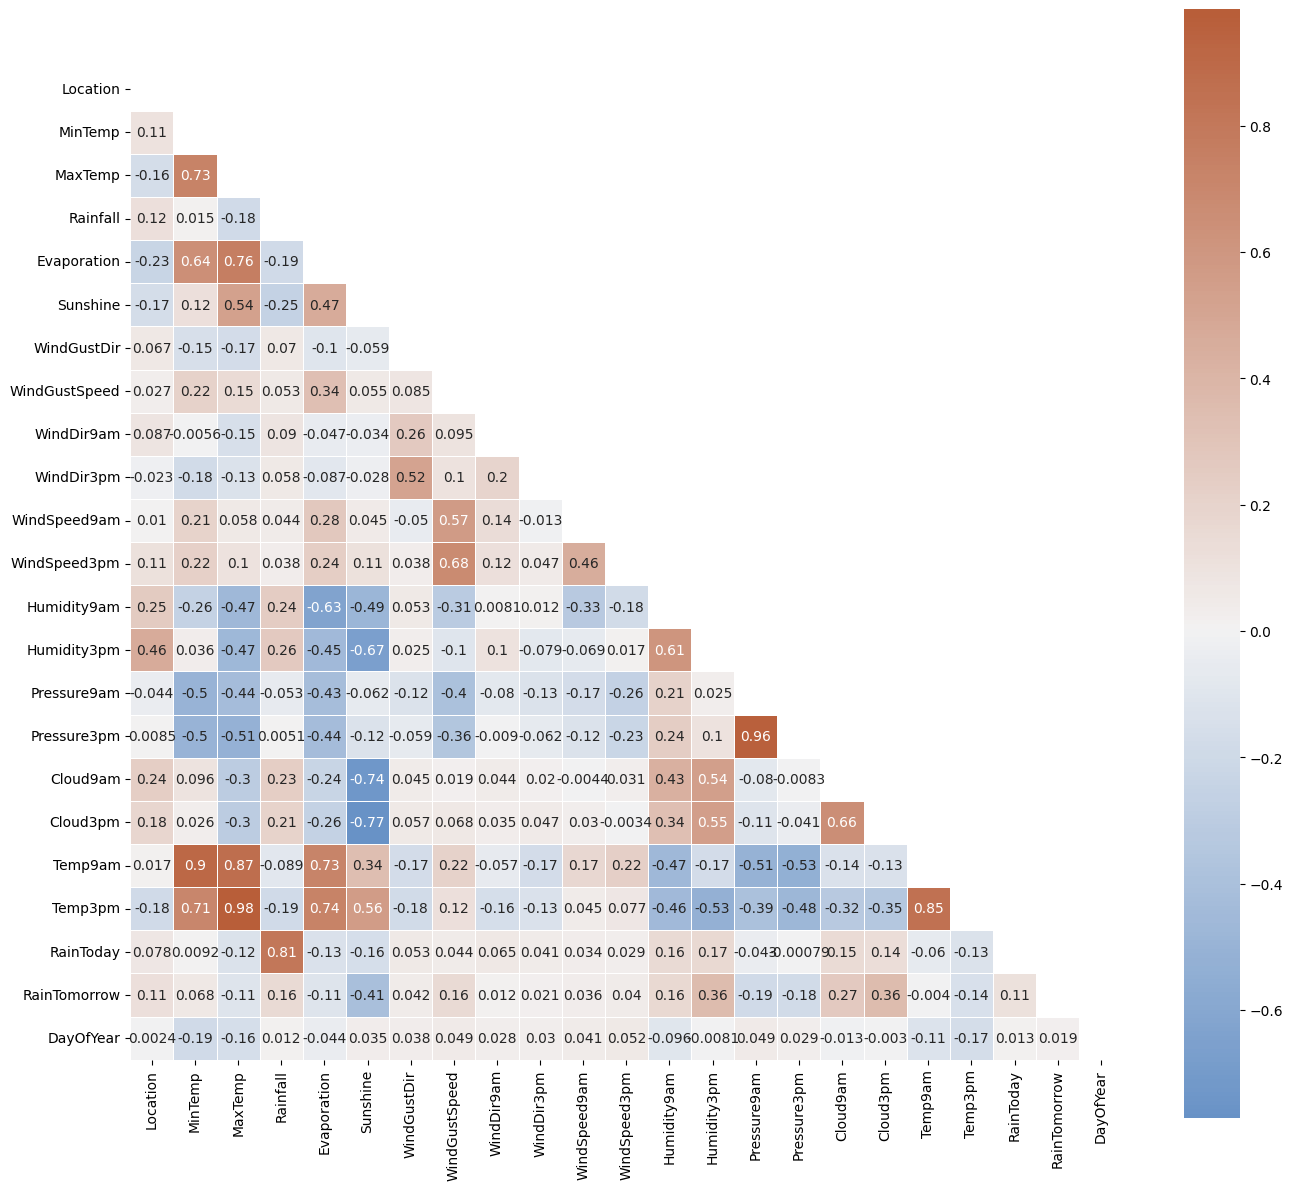

In [210]:
corr = df_imputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 16))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

In [236]:
model_rf.feature_importances_

array([0.03129404, 0.02145272, 0.02290278, 0.0746639 , 0.01918944,
       0.15588463, 0.01883628, 0.03804849, 0.02266107, 0.01828699,
       0.01952302, 0.02181957, 0.02621138, 0.08844979, 0.03925546,
       0.06293987, 0.08390217, 0.15827162, 0.02047075, 0.02477807,
       0.00591095, 0.025247  ])

In [237]:
model_rf.feature_names_in_

array(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'DayOfYear'],
      dtype=object)

In [238]:
t1 = pd.DataFrame(model_rf.feature_importances_, columns=['score'])
t2 = pd.DataFrame(model_rf.feature_names_in_, columns=['name'])
df_feature_importance = pd.concat([t1.reset_index(drop=True),t2.reset_index(drop=True)],axis=1).sort_values(by='score',ascending=False).reset_index(drop=True)
df_feature_importance

,score,name
0,0.158272,Cloud3pm
1,0.155885,Sunshine
2,0.088450,Humidity3pm
3,0.083902,Cloud9am
4,0.074664,Rainfall
5,0.062940,Pressure3pm
6,0.039255,Pressure9am
7,0.038048,WindGustSpeed
8,0.031294,Location
9,0.026211,Humidity9am


In [244]:
feature_importance = np.array(df_feature_importance['name'][:3])
feature_importance

array(['Cloud3pm', 'Sunshine', 'Humidity3pm'], dtype=object)

In [243]:
for i in range(3, 22):
    feature_importance = np.array(df_feature_importance['name'][:i])
    X_train_resempled, X_test, y_train_resempled, y_test = split_hold_out_samples(df_imputed[feature_importance], df_imputed['RainTomorrow'])
    model_xg.fit(X_train_resempled, y_train_resempled)
    y_pred = model_xg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'The number of features: {i}')
    print(f'The accuracy: {accuracy}')

The number of features: 3
The accuracy: 0.782146604023172
The number of features: 4
The accuracy: 0.8129361857410026
The number of features: 5
The accuracy: 0.8263467591114355
The number of features: 6
The accuracy: 0.8440906810199335
The number of features: 7
The accuracy: 0.8509784244856999
The number of features: 8
The accuracy: 0.8601012635132053
The number of features: 9
The accuracy: 0.8779820280071158
The number of features: 10
The accuracy: 0.8773434292751905
The number of features: 11
The accuracy: 0.8825434475208684
The number of features: 12
The accuracy: 0.8829083610819687
The number of features: 13
The accuracy: 0.8903434748893856
The number of features: 14
The accuracy: 0.8901154039136979
The number of features: 15
The accuracy: 0.8907540026456233
The number of features: 16
The accuracy: 0.8937645395247001
The number of features: 17
The accuracy: 0.8922592710851617
The number of features: 18
The accuracy: 0.891939971719199
The number of features: 19
The accuracy: 0.890297

In [245]:
feature_importance = np.array(df_feature_importance['name'][:16])

In [246]:
X_train_resempled, X_test, y_train_resempled, y_test = split_hold_out_samples(df_imputed[feature_importance], df_imputed['RainTomorrow'])

Accuracy = 0.8755644756648269
ROC Area under Curve = 0.79293508786197
Time taken = 130.56187915802002
              precision    recall  f1-score   support

           0    0.93799   0.91296   0.92531     18508
           1    0.58787   0.67291   0.62753      3415

    accuracy                        0.87556     21923
   macro avg    0.76293   0.79294   0.77642     21923
weighted avg    0.88345   0.87556   0.87892     21923



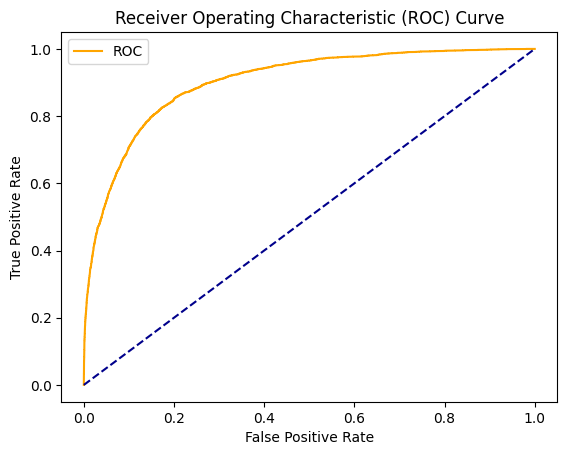

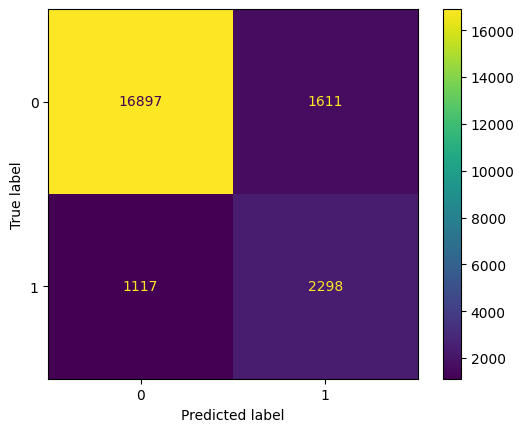

In [247]:
model_rf, accuracy, roc_auc, f1, time_taken = run_model(model_rf, X_train_resempled, y_train_resempled, X_test, y_test)

## Hyperparameters tuning

In [250]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from ray import tune

### Random Forest Classifier

In [296]:
# param_rf = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': np.arange(3, 21),
#     'min_samples_split': np.arange(2, 11),
#     'min_samples_leaf': np.arange(1, 11)
# }
# random_search = RandomizedSearchCV(
#     estimator=model_rf,
#     param_distributions=param_rf,
#     n_iter=30,
#     scoring='accuracy',
#     cv=5,
#     verbose=1,
#     n_jobs=-1,
#     random_state=42
# )
# random_search.fit(X_train_resempled, y_train_resempled)
# best_params_rf = random_search.best_params_

In [297]:
# model_rf = RandomForestClassifier(**best_params_rf)

In [298]:
# model_rf, accuracy_rf, roc_auc_rf, f1_rf, t_rf = run_model(model_rf, X_train_resempled, y_train_resempled, X_test, y_test)

In [299]:
def train_rf(config):
    model = RandomForestClassifier(
        n_estimators=config['n_estimators'],
        max_depth=config['max_depth'],
        min_samples_split=config['min_samples_split'],
        min_samples_leaf=config['min_samples_leaf']
    )
    model.fit(X_train_resempled, y_train_resempled)
    acc = model.score(X_test, y_test)
    tune.report({"accuracy": acc})

In [300]:
search_space = {
    'n_estimators': tune.randint(100, 500),
    'max_depth': tune.randint(3, 20),
    'min_samples_split': tune.randint(2, 10),
    'min_samples_leaf': tune.randint(1, 10)
}

analysis = tune.run(
    train_rf,
    config=search_space,
    num_samples=30,
    resources_per_trial={"cpu": 1},
    metric="accuracy",
    mode="max"
)

2025-04-15 12:00:01,745	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


2025-04-15 12:00:17,763	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\taing\AppData\Local\Temp\ray\session_2025-04-14_22-15-18_289725_28872\artifacts\2025-04-15_12-00-02\train_rf_2025-04-15_12-00-02\driver_artifacts\train_rf_b079a_00000_0_max_depth=10,min_samples_leaf=8,min_samples_split=8,n_estimators=340_2025-04-15_12-00-17
2025-04-15 12:00:18,149	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\taing\AppData\Local\Temp\ray\session_2025-04-14_22-15-18_289725_28872\artifacts\2025-04-15_12-00-02\train_rf_2025-04-15_12-00-02\driver_artifacts\train_rf_b079a_00000_0_max_depth=10,min_samples_leaf=8,min_samples_split=8,n_estimators=340_2025-04-15_12-00-17
2025-04-15 12:00:18,171	WARNING trial.py:647 -- The path to the trial log directory is too long (max lengt

Trial name,accuracy
train_rf_b079a_00000,0.831501
train_rf_b079a_00001,0.771747
train_rf_b079a_00002,0.823519
train_rf_b079a_00003,0.863112
train_rf_b079a_00004,0.842312
train_rf_b079a_00005,0.864663
train_rf_b079a_00006,0.801168
train_rf_b079a_00007,0.801852
train_rf_b079a_00008,0.841628
train_rf_b079a_00009,0.772978


2025-04-15 12:05:35,841	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\taing\AppData\Local\Temp\ray\session_2025-04-14_22-15-18_289725_28872\artifacts\2025-04-15_12-00-02\train_rf_2025-04-15_12-00-02\driver_artifacts\train_rf_b079a_00007_7_max_depth=7,min_samples_leaf=2,min_samples_split=9,n_estimators=113_2025-04-15_12-00-20
2025-04-15 12:06:34,128	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\taing\AppData\Local\Temp\ray\session_2025-04-14_22-15-18_289725_28872\artifacts\2025-04-15_12-00-02\train_rf_2025-04-15_12-00-02\driver_artifacts\train_rf_b079a_00022_22_max_depth=8,min_samples_leaf=6,min_samples_split=9,n_estimators=458_2025-04-15_12-00-25
2025-04-15 12:06:34,152	WARNING trial.py:647 -- The path to the trial log directory is too long (max length

In [301]:
analysis.best_config

{'n_estimators': 337,
 'max_depth': 19,
 'min_samples_split': 7,
 'min_samples_leaf': 2}

In [302]:
model_rf = RandomForestClassifier(**analysis.best_config)

Accuracy = 0.8794872964466542
ROC Area under Curve = 0.7922734690170781
Time taken = 466.8897795677185
              precision    recall  f1-score   support

           0    0.93708   0.91895   0.92793     18508
           1    0.60244   0.66559   0.63244      3415

    accuracy                        0.87949     21923
   macro avg    0.76976   0.79227   0.78019     21923
weighted avg    0.88495   0.87949   0.88190     21923



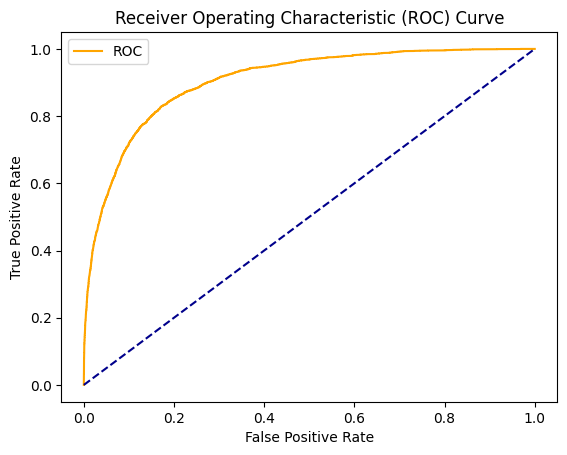

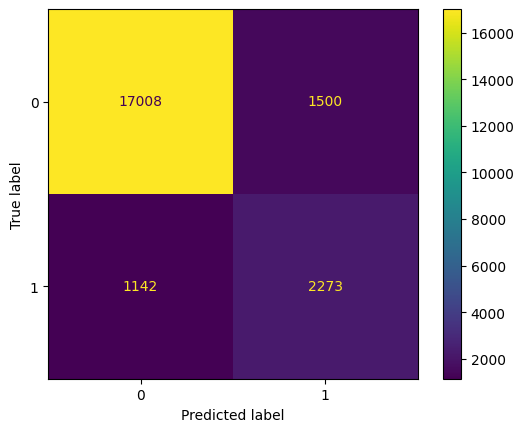

In [303]:
model_rf, accuracy_rf, roc_auc_rf, f1_rf, t_rf = run_model(model_rf, X_train_resempled, y_train_resempled, X_test, y_test)

### KNN model

In [305]:
param_knn = {
    'n_neighbors': [3, 5, 7, 9]
}
X_train_normalized = min_max_sc.fit_transform(X_train_resempled)
X_test_normalized = min_max_sc.transform(X_test)
randomized_search = RandomizedSearchCV(model_knn, param_knn, n_iter=4, cv=5, scoring='accuracy')
randomized_search.fit(X_train_normalized, y_train_resempled)
best_params_knn = randomized_search.best_params_

In [306]:
best_params_knn

{'n_neighbors': 3}

In [307]:
model_knn = KNeighborsClassifier(**best_params)

Accuracy = 0.8001185969073575
ROC Area under Curve = 0.7507590560340176
Time taken = 7.442610025405884
              precision    recall  f1-score   support

           0    0.93283   0.82246   0.87417     18508
           1    0.41374   0.67906   0.51419      3415

    accuracy                        0.80012     21923
   macro avg    0.67329   0.75076   0.69418     21923
weighted avg    0.85197   0.80012   0.81810     21923



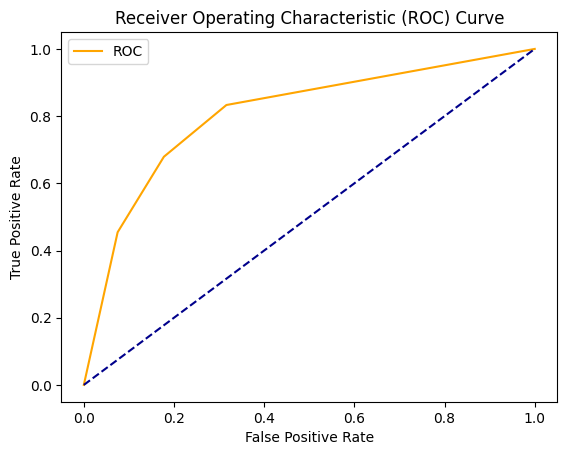

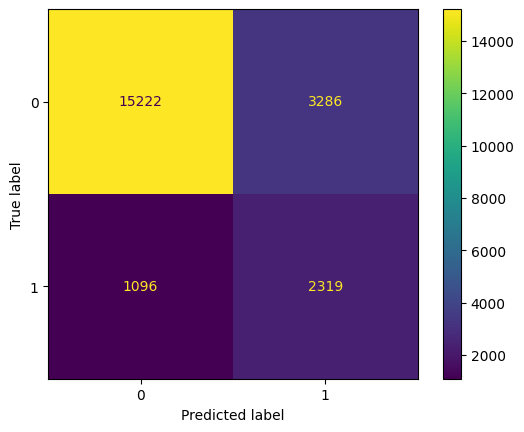

In [308]:
model_knn, accuracy_knn, roc_auc_knn, f1_knn, t_knn = run_model(model_knn, X_train_normalized, y_train_resempled, X_test_normalized, y_test)

### XGBoost model

In [314]:
def train_xg(config):
    model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        n_estimators=config['n_estimators'],
        learning_rate=config['learning_rate'],
        max_depth=config['max_depth'],
        subsample=config['subsample'],
        colsample_bytree=config['colsample_bytree'],
        gamma=config['gamma'],
        reg_alpha=config['reg_alpha'],
        reg_lambda=config['reg_lambda'],
        min_child_weight=config['min_child_weight']
    )
    model.fit(X_train_resempled, y_train_resempled)
    acc = model.score(X_test, y_test)
    tune.report({"accuracy": acc})

In [315]:
search_space = {
    'n_estimators': tune.choice([100, 200, 300, 400, 500]),
    'learning_rate': tune.choice([0.01, 0.05, 0.1, 0.2]),
    'max_depth': tune.choice([3, 4, 5, 6, 8, 10]),
    'subsample': tune.choice([0.6, 0.7, 0.8, 1.0]),
    'colsample_bytree': tune.choice([0.6, 0.7, 0.8, 1.0]),
    'gamma': tune.choice([0, 0.1, 0.2, 0.5]),
    'reg_alpha': tune.choice([0, 0.01, 0.1, 1]),
    'reg_lambda': tune.choice([0.5, 1, 1.5, 2]),
    'min_child_weight': tune.choice([1, 3, 5, 7])
}

analysis = tune.run(
    train_xg,
    config=search_space,
    num_samples=50,
    resources_per_trial={"cpu": 1},
    metric="accuracy",
    mode="max"
)

2025-04-15 12:58:23,320	INFO tune.py:616 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949


2025-04-15 12:58:48,435	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\taing\AppData\Local\Temp\ray\session_2025-04-14_22-15-18_289725_28872\artifacts\2025-04-15_12-58-23\train_xg_2025-04-15_12-58-23\driver_artifacts\train_xg_d79ff_00000_0_colsample_bytree=0.8000,gamma=0.1000,learning_rate=0.2000,max_depth=8,min_child_weight=3,n_estimators=500,r_2025-04-15_12-58-48
2025-04-15 12:58:48,762	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\taing\AppData\Local\Temp\ray\session_2025-04-14_22-15-18_289725_28872\artifacts\2025-04-15_12-58-23\train_xg_2025-04-15_12-58-23\driver_artifacts\train_xg_d79ff_00000_0_colsample_bytree=0.8000,gamma=0.1000,learning_rate=0.2000,max_depth=8,min_child_weight=3,n_estimators=500,r_2025-04-15_12-58-48
2025-04-15 12:58:48,772	WARN

Trial name,accuracy
train_xg_d79ff_00000,0.90941
train_xg_d79ff_00001,0.908361
train_xg_d79ff_00002,0.842038
train_xg_d79ff_00003,0.905624
train_xg_d79ff_00004,0.906035
train_xg_d79ff_00005,0.902614
train_xg_d79ff_00006,0.870593
train_xg_d79ff_00007,0.897733
train_xg_d79ff_00008,0.85627
train_xg_d79ff_00009,0.81987


2025-04-15 12:59:39,669	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\taing\AppData\Local\Temp\ray\session_2025-04-14_22-15-18_289725_28872\artifacts\2025-04-15_12-58-23\train_xg_2025-04-15_12-58-23\driver_artifacts\train_xg_d79ff_00012_12_colsample_bytree=1.0000,gamma=0,learning_rate=0.0500,max_depth=4,min_child_weight=5,n_estimators=100,reg_a_2025-04-15_12-58-52
2025-04-15 12:59:50,601	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\taing\AppData\Local\Temp\ray\session_2025-04-14_22-15-18_289725_28872\artifacts\2025-04-15_12-58-23\train_xg_2025-04-15_12-58-23\driver_artifacts\train_xg_d79ff_00019_19_colsample_bytree=0.6000,gamma=0,learning_rate=0.0500,max_depth=8,min_child_weight=1,n_estimators=100,reg_a_2025-04-15_12-58-54
2025-04-15 12:59:51,245	WARN

In [317]:
best_params_xg = analysis.best_config
best_params_xg

{'n_estimators': 400,
 'learning_rate': 0.1,
 'max_depth': 10,
 'subsample': 1.0,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'reg_alpha': 0.1,
 'reg_lambda': 1.5,
 'min_child_weight': 3}

In [318]:
model_xg = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    **best_params_xg
)

Accuracy = 0.9101400355790722
ROC Area under Curve = 0.7829663465539496
Time taken = 10.274560451507568
              precision    recall  f1-score   support

           0    0.92885   0.96769   0.94787     18508
           1    0.77357   0.59824   0.67470      3415

    accuracy                        0.91014     21923
   macro avg    0.85121   0.78297   0.81129     21923
weighted avg    0.90466   0.91014   0.90532     21923



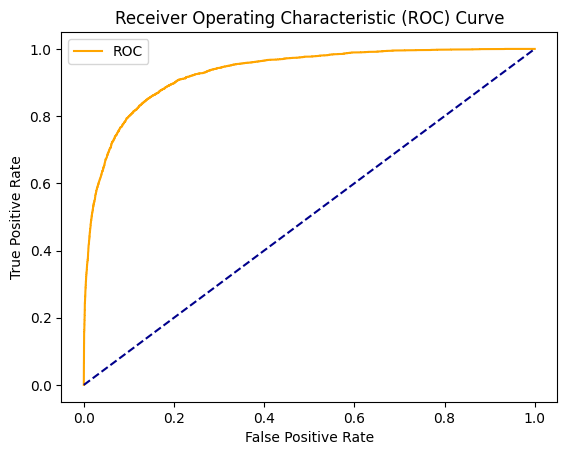

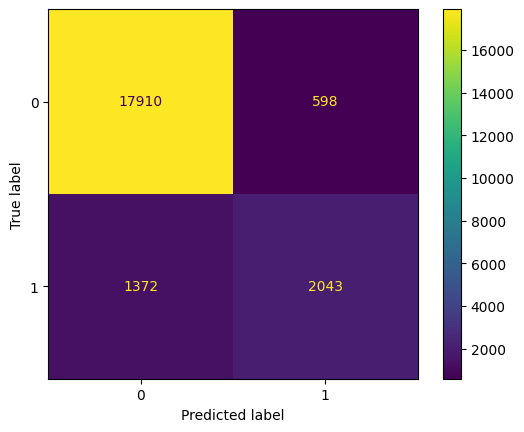

In [320]:
model_xg, accuracy_xg, roc_auc_xg, f1_xg, t_xg = run_model(model_xg, X_train_resempled, y_train_resempled, X_test, y_test)

# Visualize model performance

In [321]:
accuracy_scores = [accuracy_rf, accuracy_knn, accuracy_xg, accuracy_nb, accuracy_lr]
roc_auc_scores = [roc_auc_rf, roc_auc_knn, roc_auc_xg, roc_auc_nb, roc_auc_lr]
f1_scores = [f1_rf, f1_knn, f1_xg, f1_nb, f1_lr]
tt = [t_rf, t_knn, t_xg, t_nb, t_lr]

In [322]:
model_data = {'Model': ['Random Forest Classifier','K-nearest Neighbor','XGBoost','Gaussian Bayes','Logistic Regression'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'f1_score': f1_scores,
              'Time taken': tt}

In [323]:
data = pd.DataFrame(model_data)

C:\Users\taing\AppData\Local\Temp\ipykernel_28872\2163894330.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')


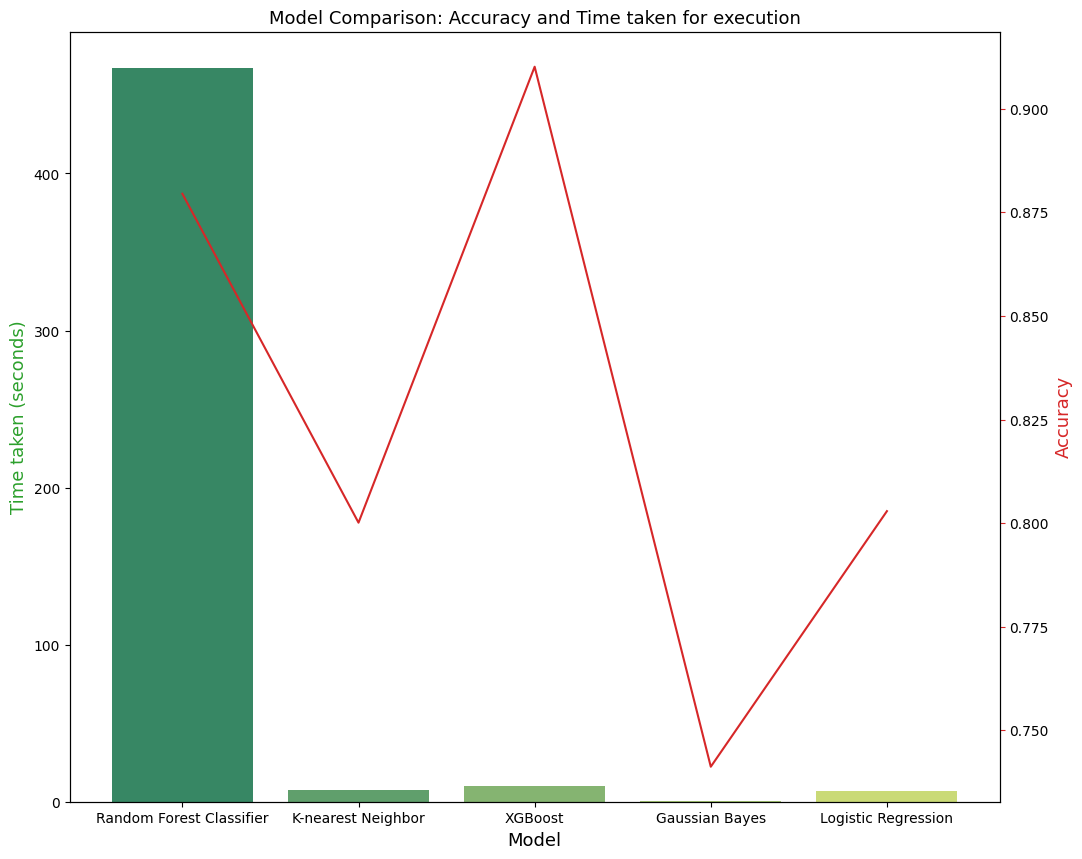

In [328]:
fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken (seconds)', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

C:\Users\taing\AppData\Local\Temp\ipykernel_28872\1631185939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')


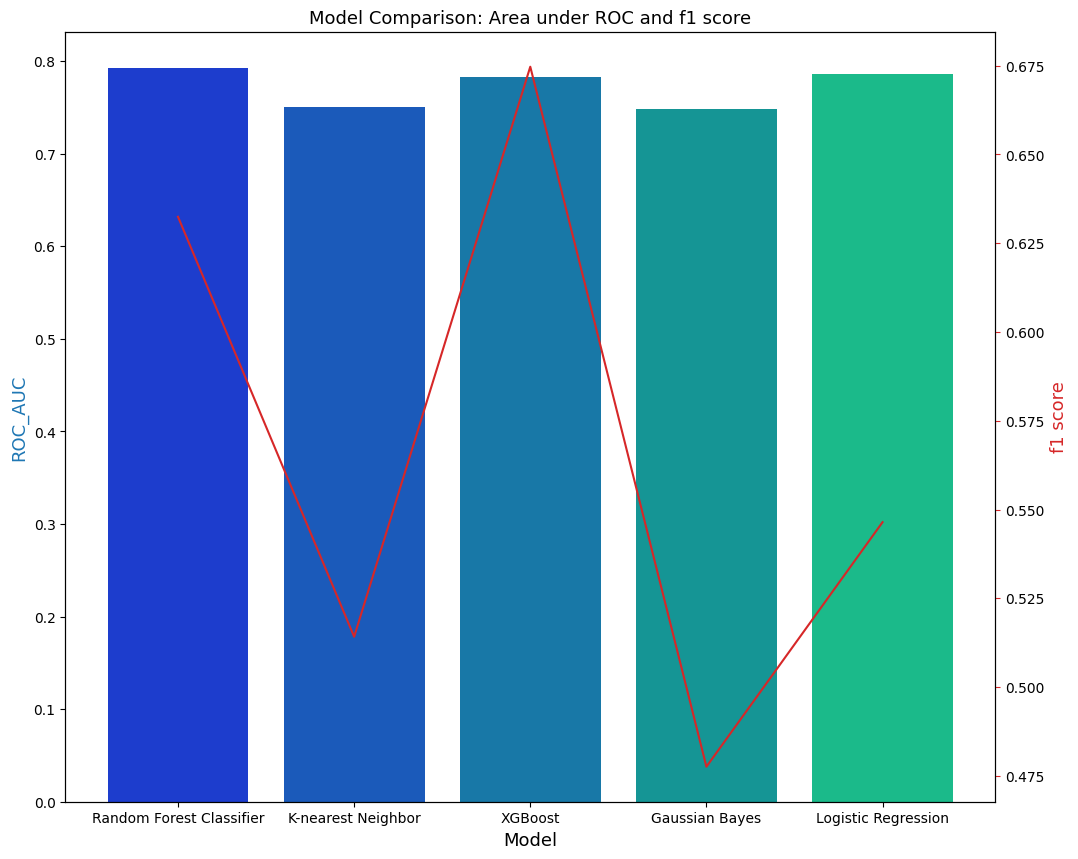

In [327]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and f1 score', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('f1 score', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='f1_score', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()